# 🎧 **Laporan Proyek Machine Learning - Krismono Sadi**

## 📌 Sistem Rekomendasi Lagu Spotify

### 🔍 Sumber Data

Dataset dikumpulkan melalui proses *scraping* menggunakan **Spotify Web API** resmi. Dokumentasi lengkap API dapat diakses melalui tautan berikut:

👉 [Spotify Developer API](https://developer.spotify.com/documentation/web-api?directory=true)

Dataset hasil *scraping* dapat diakses secara terbuka di Kaggle:
🎵 [Kaggle Dataset - Spotify Music Cris](https://www.kaggle.com/datasets/krismonosadi/spotify-music-cris)


---

## 🎵 Domain Proyek: Sistem Rekomendasi Musik

**Kategori Proyek**:

* Recommender System
* Information Retrieval
* Content-Based Filtering
* Machine Learning for Media & Entertainment

**Penjelasan**:

Proyek ini berada dalam domain sistem rekomendasi musik, yaitu cabang dari *Information Retrieval* dan *Machine Learning* yang berfokus pada pemberian rekomendasi lagu yang relevan kepada pengguna. Sistem ini menggunakan pendekatan **Content-Based Filtering**, yaitu memberikan rekomendasi berdasarkan kemiripan fitur lagu, seperti durasi dan popularitas.

Ciri khas sistem ini:

* Tidak bergantung pada data interaksi pengguna seperti *ratings*, *likes*, atau *play history*.
* Rekomendasi diberikan berdasarkan fitur konten lagu itu sendiri.
* Bukan termasuk dalam *Collaborative Filtering* karena tidak menggunakan *user profile*.

---

## 📖 **Project Overview**

Sistem rekomendasi musik merupakan komponen penting dalam platform streaming audio digital seperti Spotify. Mengingat jutaan lagu tersedia, sistem ini berperan dalam membantu pengguna menemukan musik yang sesuai dengan preferensi mereka secara efisien.

Pada proyek ini, dikembangkan sebuah sistem rekomendasi berbasis konten (**Content-Based Filtering**) yang menyarankan lagu-lagu mirip berdasarkan fitur numerik (contohnya: durasi) dan informasi terkait artis. Sistem ini tidak mengandalkan data eksplisit dari pengguna, sehingga proses rekomendasi sepenuhnya bergantung pada kesamaan konten antar lagu.

---

## 🧠 **Business Understanding**

### 🎯 Problem Statements

* Bagaimana merancang sistem rekomendasi yang mampu memberikan saran lagu yang relevan berdasarkan kemiripan fitur lagu?
* Bagaimana mengevaluasi performa sistem rekomendasi tanpa adanya data interaksi pengguna seperti rating atau riwayat pemutaran?

### ✅ Goals

* Mengembangkan sistem rekomendasi **Top-N Lagu** menggunakan pendekatan **Content-Based Filtering**.
* Melakukan evaluasi performa sistem dengan menggunakan metrik sederhana **Precision\@K**, berdasarkan asumsi bahwa lagu dari artis yang sama dianggap relevan.

### 💡 Solution Approach

* **Content-Based Filtering**: Sistem dibangun menggunakan fitur numerik dari lagu seperti `duration_ms`. Fitur ini dinormalisasi menggunakan **MinMaxScaler** sebelum digunakan dalam perhitungan kemiripan menggunakan **Cosine Similarity**.
* **Evaluasi Relevansi**: Karena tidak tersedia data eksplisit dari pengguna, lagu dari **artis yang sama** diasumsikan sebagai lagu relevan, dan pendekatan ini digunakan untuk menghitung **Precision\@K**.

---

Jika Anda menginginkan, saya juga dapat melanjutkan perbaikan bagian selanjutnya seperti **Data Preparation**, **Modeling**, atau **Evaluation**.


# 1. Import Library

# Penjelasan:
Pada tahap ini, kita mengimpor pustaka-pustaka yang dibutuhkan, seperti pandas untuk manipulasi data,
matplotlib dan seaborn untuk visualisasi, serta sklearn untuk preprocessing dan evaluasi model.

In [ ]:
import os
import random
import shutil
from pathlib import Path

import numpy as np
import pandas as pd
import requests
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score  # untuk evaluasi precision@k

# 2. Download dan Load Dataset

Mari Kita Download & Ekstrak Datasetnya Dari Kaggle


In [ ]:
target_folder = Path("Musify_Rekomendasi_Musik")
target_folder.mkdir(parents=True, exist_ok=True)

url = "https://www.kaggle.com/api/v1/datasets/download/krismonosadi/spotify-music-cris"
zip_path = target_folder / "spotify-music-cris.zip"

response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Berhasil mengunduh dataset ke:", zip_path)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(target_folder)
    print("Berhasil ekstrak dataset ke:", target_folder)
else:
    print("Gagal mengunduh dataset, status code:", response.status_code)
    print("Kamu harus menggunakan kagglehub atau kaggle CLI dengan autentikasi token.")

Berhasil mengunduh dataset ke: Musify_Rekomendasi_Musik\spotify-music-cris.zip
Berhasil ekstrak dataset ke: Musify_Rekomendasi_Musik



# Penjelasan:
Dataset dimuat dari file CSV ke dalam DataFrame Pandas untuk mempermudah analisis dan pemrosesan data selanjutnya.

In [ ]:
path = "Musify_Rekomendasi_Musik/spotify_cris_music1.csv"
df = pd.read_csv(path)
print(f"Dataset berhasil dimuat dari: {path}")

Dataset berhasil dimuat dari: Musify_Rekomendasi_Musik/spotify_cris_music1.csv


# **3. Data Understanding**

**Dataset ini telah diunggah secara publik di Kaggle agar dapat diakses langsung oleh siapa saja.**

Dataset dikumpulkan secara mandiri melalui *scraping* menggunakan **Spotify Developer API**:

👉 [Spotify Developer API](https://developer.spotify.com/documentation/web-api?directory=true)

Dataset hasil *scraping* dapat diakses secara terbuka di Kaggle:
🎵 [Kaggle Dataset - Spotify Music Cris](https://www.kaggle.com/datasets/krismonosadi/spotify-music-cris)

Dataset berisi metadata lagu dari Spotify dengan 5.624 entri lagu, dan Data meliputi nama lagu, artis, popularitas, durasi, hingga tanggal rilis.

Variabel utama (kolom) dan Deskripsi Fitur Dataset

| **Kolom**         | **Deskripsi**                                                                                                                                                                                                                                                                                                                        |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **name**          | Nama lagu yang direkam pada dataset. Kolom ini tidak memiliki nilai kosong, sehingga semua lagu memiliki nama yang tercatat dengan lengkap.                                                                                                                                                                                          |
| **artist**        | Nama artis atau band yang membawakan lagu tersebut. Tidak ada nilai kosong, sehingga setiap lagu terasosiasi dengan artis yang jelas.                                                                                                                                                                                                |
| **album**         | Nama album tempat lagu tersebut termasuk. Semua lagu memiliki informasi album lengkap, tanpa nilai kosong. Memberikan konteks koleksi lagu yang dirilis bersama-sama.                                                                                                                                                                |
| **popularity**    | Skor popularitas lagu, berupa nilai numerik antara 0 sampai 100. Kolom ini lengkap tanpa nilai kosong, mencerminkan popularitas lagu berdasarkan jumlah pemutaran, tren, dan engagement pengguna.                                                                                                                                    |
| **explicit**      | Status lagu apakah mengandung konten eksplisit atau tidak. Nilainya lengkap tanpa kosong, berupa `True` atau `False`. Berguna untuk filtering berdasarkan usia atau kebijakan platform.                                                                                                                                              |
| **release\_date** | Tanggal resmi lagu tersebut dirilis ke publik, dengan format `YYYY-MM-DD` atau `YYYY`. Tidak ada nilai kosong, sehingga semua lagu memiliki tanggal rilis yang tercatat.                                                                                                                                                             |
| **duration\_ms**  | Durasi lagu dalam satuan milidetik (ms). Kolom ini lengkap tanpa nilai kosong. Untuk interpretasi yang lebih mudah, durasi bisa dikonversi ke menit dan detik (misal: 3 menit 45 detik).                                                                                                                                             |
| **preview\_url**  | URL menuju potongan singkat lagu (preview) yang dapat diputar secara online. Kolom ini memiliki banyak nilai kosong (5624), artinya sebagian besar lagu tidak memiliki link preview yang tersedia. Biasanya preview berdurasi sekitar 30 detik dan membantu pengguna mendengarkan sampel lagu sebelum memutuskan memutar lagu penuh. |


---
 Menampilkan 5 baris pertama

In [ ]:
print("\n===== 5 Baris Pertama Dataset =====")
print(df.head())


===== 5 Baris Pertama Dataset =====
                name                               artist  \
0   ｢ごめん｣で済むなら恋などしない  白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄   
1         白皇学院生徒会不心得  白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄   
2       轟轟生徒会タンケンジャー  白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄   
3  アイ･ラブ･ユーならシャウトして!  白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄   
4     Princess is me                  瀬川 泉 starring 矢作紗友里   

                                        album  popularity  explicit  \
0  「ハヤテのごとく！」キャラクター COLLECTION／白皇学院生徒会三人娘&桂雪路           0     False   
1  「ハヤテのごとく！」キャラクター COLLECTION／白皇学院生徒会三人娘&桂雪路           0     False   
2  「ハヤテのごとく！」キャラクター COLLECTION／白皇学院生徒会三人娘&桂雪路           0     False   
3  「ハヤテのごとく！」キャラクター COLLECTION／白皇学院生徒会三人娘&桂雪路           0     False   
4  「ハヤテのごとく！」キャラクター COLLECTION／白皇学院生徒会三人娘&桂雪路           1     False   

  release_date  duration_ms  preview_url  
0   2011-10-26       186813          NaN  
1   2011-10-26       285746          NaN  
2   2011-10-26       204586          NaN

**Struktur Data (df.info(), shape, dtypes)**

### Tabel Struktur Data

| No | Kolom         | Non-Null Count | Tipe Data |
|----|---------------|----------------|-----------|
| 0  | name          | 5624           | object    |
| 1  | artist        | 5624           | object    |
| 2  | album         | 5624           | object    |
| 3  | popularity    | 5624           | int64     |
| 4  | explicit      | 5624           | bool      |
| 5  | release_date  | 5624           | object    |
| 6  | duration_ms   | 5624           | int64     |
| 7  | preview_url   | 0              | float64   |

**Total Baris**: 5624  
**Total Kolom**: 8  
**Penggunaan Memori**: ~313.2+ KB  

In [ ]:
print("\nInfo Data:")
print(df.info())


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5624 non-null   object 
 1   artist        5624 non-null   object 
 2   album         5624 non-null   object 
 3   popularity    5624 non-null   int64  
 4   explicit      5624 non-null   bool   
 5   release_date  5624 non-null   object 
 6   duration_ms   5624 non-null   int64  
 7   preview_url   0 non-null      float64
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 313.2+ KB
None


**Jumlah data (baris dan kolom)**

Jumlah data: 5624 baris dan 8 kolom

In [ ]:
print(f"Jumlah data: {df.shape[0]} baris dan {df.shape[1]} kolom")

Jumlah data: 5624 baris dan 8 kolom


# Jumlah missing values

| Kolom         | Nilai Kosong |
| ------------- | ------------ |
| name          | 0            |
| artist        | 0            |
| album         | 0            |
| popularity    | 0            |
| explicit      | 0            |
| release\_date | 0            |
| duration\_ms  | 0            |
| preview\_url  | 5624         |


In [ ]:
print("\n===== Nilai Kosong per Kolom =====")
print(df.isnull().sum())



===== Nilai Kosong per Kolom =====
name               0
artist             0
album              0
popularity         0
explicit           0
release_date       0
duration_ms        0
preview_url     5624
dtype: int64


**Deskripsi Statistik (df.describe())**

| Statistik | popularity  | duration\_ms | preview\_url |
| --------- | ----------- | ------------ | ------------ |
| count     | 5624.000000 | 5624.000000  | 0.0          |
| mean      | 15.677809   | 197499.4232  | NaN          |
| std       | 15.031440   | 81228.9246   | NaN          |
| min       | 0.000000    | 7786.0000    | NaN          |
| 25%       | 4.000000    | 116571.0000  | NaN          |
| 50%       | 13.000000   | 217079.0000  | NaN          |
| 75%       | 24.000000   | 262133.0000  | NaN          |
| max       | 87.000000   | 511306.0000  | NaN          |


In [ ]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
        popularity    duration_ms  preview_url
count  5624.000000    5624.000000          0.0
mean     15.677809  197499.423186          NaN
std      15.031440   81228.924554          NaN
min       0.000000    7786.000000          NaN
25%       4.000000  116571.000000          NaN
50%      13.000000  217079.000000          NaN
75%      24.000000  262133.000000          NaN
max      87.000000  511306.000000          NaN


**Cek duplikat berdasarkan 'name' dan 'artist'**

In [ ]:
dupe_subset = df.duplicated(subset=['name', 'artist']).sum()
print(f"Jumlah duplikat berdasarkan 'name' dan 'artist': {dupe_subset}")

Jumlah duplikat berdasarkan 'name' dan 'artist': 4398


**Cek Duplikat Seluruh Kolom**

Jumlah duplikat dalam dataset: 4379

In [ ]:
total_dupe = df.duplicated().sum()
print(f"\nJumlah duplikat total (seluruh kolom): {total_dupe}")


Jumlah duplikat total (seluruh kolom): 4379


Jumlah duplikat berdasarkan 'name' dan 'artist': 4398

**Cek Outlier (tanpa hapus dulu, cukup identifikasi)**

Jumlah outlier per fitur:
popularity     188
duration_ms     12
preview_url      0
dtype: int64

In [ ]:
numerik_df = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerik_df.quantile(0.25)
Q3 = numerik_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((numerik_df < lower_bound) | (numerik_df > upper_bound)).sum()
print("\nJumlah outlier per fitur:")
print(outliers)


Jumlah outlier per fitur:
popularity     188
duration_ms     12
preview_url      0
dtype: int64


# Visualisasi distribusi fitur

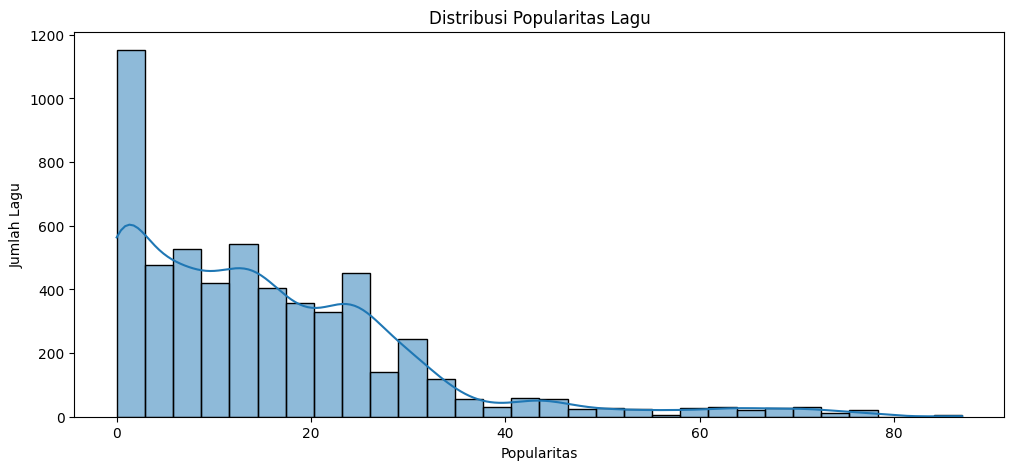

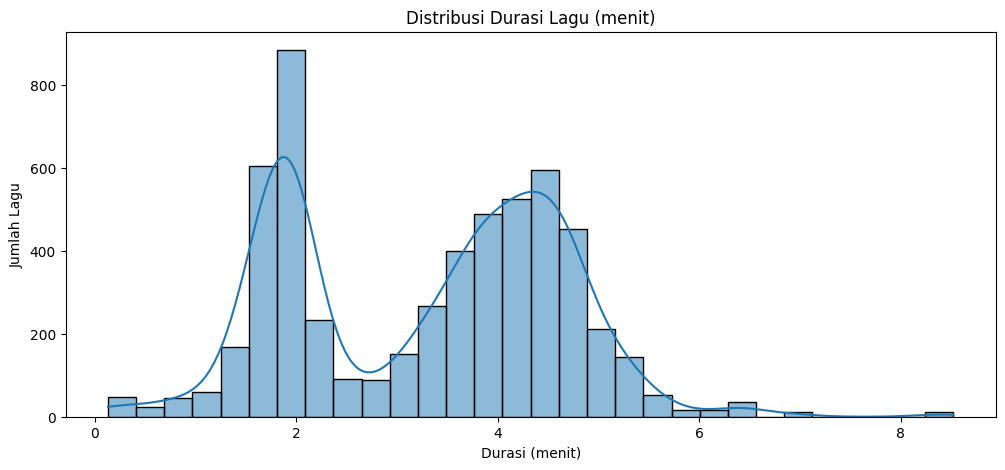

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Jumlah Lagu')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['duration_ms'] / 60000, kde=True, bins=30)
plt.title('Distribusi Durasi Lagu (menit)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Lagu')
plt.show()


# **4.Data Preparation**

1. Hapus Duplikat

Duplikat dapat menyebabkan bias pada analisis dan hasil prediksi. Oleh karena itu, dilakukan penghapusan data duplikat berdasarkan kombinasi kolom 'name' dan 'artist' agar setiap lagu unik dalam dataset.

In [ ]:
df = df.drop_duplicates(subset=['name', 'artist'])
print(f"Jumlah data setelah drop duplikat: {df.shape[0]}")

Jumlah data setelah drop duplikat: 1226


2. Hapus Outlier (gunakan IQR)

Outlier dapat memengaruhi distribusi data dan performa model. Oleh karena itu, digunakan metode Interquartile Range (IQR) untuk menghapus outlier dari fitur numerik. Fitur yang digunakan adalah seluruh kolom numerik, kecuali kolom yang tidak relevan seperti 'preview_url'.

Proses IQR dilakukan dengan:

Menghitung Q1 (25%) dan Q3 (75%)

Menentukan batas bawah dan atas:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Menghapus data yang berada di luar batas tersebut.

In [ ]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = data.shape[0]
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        after = data.shape[0]
        print(f"{feature}: Removed {before - after} outliers")
    return data

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'preview_url' in numerical_features:
    numerical_features.remove('preview_url')

df_cleaned = remove_outliers_iqr(df, numerical_features)

popularity: Removed 51 outliers
duration_ms: Removed 3 outliers


3. Cek & Imputasi Missing Values

Setelah data bersih dari duplikat dan outlier, dilakukan pemeriksaan nilai kosong (missing values). Jika ditemukan pada fitur seperti 'popularity' dan 'duration_ms', nilai kosong diisi menggunakan median dari kolom tersebut agar tidak terpengaruh oleh distribusi miring.

In [ ]:
for col in ['popularity', 'duration_ms']:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Missing value di kolom '{col}' diisi dengan median: {median_val}")
    else:
        print(f"Tidak ada missing value di kolom '{col}'.")

Tidak ada missing value di kolom 'popularity'.
Tidak ada missing value di kolom 'duration_ms'.


Oleh karena itu, tidak diperlukan pengisian nilai kosong dengan median pada fitur numerik setelah proses pembersihan.


 4. Mengonversi release_date ke datetime

Kolom 'release_date' dikonversi ke tipe data datetime untuk memudahkan analisis waktu di tahap selanjutnya.

In [ ]:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

5. Binning

Untuk mempermudah analisis kategorikal dan visualisasi, dilakukan binning pada dua fitur:

popularity dibagi menjadi 5 kategori: Very Low, Low, Medium, High, Very High

duration_ms dikonversi ke menit dan dibagi menjadi 4 kategori: Short, Medium, Long, Very Long

In [ ]:
bins_popularity = [0, 20, 40, 60, 80, 100]
labels_popularity = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_cleaned['popularity_binned'] = pd.cut(df_cleaned['popularity'], bins=bins_popularity, labels=labels_popularity, include_lowest=True)

df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60000
bins_duration = [0, 2, 4, 6, np.inf]
labels_duration = ['Short', 'Medium', 'Long', 'Very Long']
df_cleaned['duration_binned'] = pd.cut(df_cleaned['duration_min'], bins=bins_duration, labels=labels_duration, include_lowest=True)

6. Scaling fitur numerik

Fitur 'popularity' dan 'duration_ms' di-scale menggunakan MinMaxScaler agar nilai berada dalam rentang [0, 1]. Ini penting untuk algoritma yang sensitif terhadap skala,

In [ ]:
features = ['popularity', 'duration_ms']
scaler = MinMaxScaler()
df_scaled = df_cleaned
df_scaled[features] = scaler.fit_transform(df_scaled[features])

print("\nHasil setelah scaling:")
print(df_scaled[features].head())



Hasil setelah scaling:
   popularity  duration_ms
0    0.000000     0.438362
1    0.000000     0.680607
2    0.000000     0.481881
3    0.000000     0.642671
4    0.019231     0.654523


Seluruh proses data preparation telah dilakukan agar data yang digunakan untuk modeling benar-benar bersih, relevan, dan terstandarisasi. Hal ini diharapkan dapat meningkatkan akurasi dan generalisasi model pada tahap selanjutnya.

# 5. Modeling (Content-Based Filtering)

Metode Content-Based Filtering digunakan untuk merekomendasikan lagu-lagu yang memiliki karakteristik mirip dengan lagu yang dipilih pengguna. Pendekatan ini berfokus pada fitur numerik dari lagu — seperti popularitas dan durasi — yang telah melalui proses penskalaan agar berada dalam rentang nilai yang sebanding.

Untuk mengukur tingkat kemiripan antar lagu, digunakan metrik cosine similarity, yaitu ukuran matematis yang menghitung sudut antara dua vektor fitur dalam ruang multidimensi. Semakin kecil sudut antara dua vektor, semakin tinggi nilai kemiripan (mendekati 1), yang menandakan bahwa lagu-lagu tersebut memiliki profil karakteristik yang serupa.

---

Penjelasan singkat:
cosine_similarity(df_scaled[features])
Menghitung seberapa mirip setiap lagu dengan lagu lain berdasarkan fitur numerik seperti popularitas dan durasi, menggunakan metode cosine similarity.

Fungsi recommend_songs
Menerima nama lagu sebagai input dan mengembalikan daftar lagu lain yang paling mirip berdasarkan skor similarity, menampilkan informasi nama, artis, popularitas, dan durasi.



In [ ]:
cosine_sim = cosine_similarity(df_scaled[features])

def recommend_songs(song_name, df, cosine_sim, top_k=5):
    if song_name not in df['name'].values:
        print(f"Lagu '{song_name}' tidak ditemukan dalam dataset.")
        return pd.DataFrame()

    idx = df.index[df['name'] == song_name][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_k+1]

    song_indices = [i[0] for i in sim_scores]
    return df.iloc[song_indices][['name', 'artist', 'popularity', 'duration_min']]

# 6. Hasil Top-N Rekomendasi

Penjelasan singkat:

Sistem menampilkan 5 lagu teratas yang paling mirip dengan lagu input berdasarkan fitur seperti popularitas dan durasi. Rekomendasi ini mayoritas berasal dari artis yang sama, menunjukkan konsistensi dalam genre atau gaya musik. Namun, ada juga variasi artis lain sebagai bentuk eksplorasi relevan dari sistem.

In [ ]:
song_input = df_cleaned['name'].iloc[0]
print(f"\nRekomendasi lagu mirip dengan '{song_input}':\n")
recommendations = recommend_songs(song_input, df_cleaned, cosine_sim, top_k=5)


Rekomendasi lagu mirip dengan '｢ごめん｣で済むなら恋などしない':



Print header tabel

In [ ]:
print(f"{'No':<4} | {'Name':<25} | {'Artist':<20} | {'Popularity':<10} | {'Duration (min)':<14}")
print("-" * 80)
for i, row in enumerate(recommendations.itertuples(), 1):
    print(f"{i:<4} | {row.name:<25} | {row.artist:<20} | {row.popularity:<10} | {row.duration_min:.2f}")


No   | Name                      | Artist               | Popularity | Duration (min)
--------------------------------------------------------------------------------
1    | 白皇学院生徒会不心得                | 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄 | 0.0        | 4.76
2    | 轟轟生徒会タンケンジャー              | 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄 | 0.0        | 3.41
3    | アイ･ラブ･ユーならシャウトして!         | 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄 | 0.0        | 4.50
4    | ￥JENNEY～銭 it's my Soul～   | 桂 雪路 starring 生天目仁美  | 0.0        | 4.69
5    | もっと素顔でハーマイオニー             | 桂 雪路 featuring 綾崎ハヤテ starring 生天目仁美 featuring 白石涼子, Ayasaki Hayate | 0.0        | 3.53


**Penjelasan :**

Top-N Rekomendasi adalah daftar N lagu teratas yang direkomendasikan oleh sistem kepada pengguna berdasarkan preferensi, pola pendengaran, atau algoritma rekomendasi yang digunakan.

Dalam tabel ini, N = 5, artinya sistem memberikan 5 lagu yang dianggap paling relevan untuk direkomendasikan.

Semua lagu pada daftar ini memiliki popularitas = 0, yang kemungkinan menunjukkan bahwa lagu-lagu ini kurang dikenal secara umum atau merupakan lagu niche.

Durasi tiap lagu tercantum dalam menit, memberikan gambaran berapa lama setiap lagu berdurasi sehingga pengguna bisa mempertimbangkan waktu mendengarkan.

Kebanyakan lagu pada daftar ini dinyanyikan oleh 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄, artinya sistem merekomendasikan lagu yang berasal dari artis yang sama atau terkait, sehingga menunjukkan fokus pada konsistensi genre/artis.

Lagu ke-4 dan ke-5 berasal dari artis yang berbeda (桂 雪路 dan 生天目仁美), ini menandakan sistem juga memperluas rekomendasi dengan artis lain yang masih mungkin relevan.

---

# 7. Evaluation (Precision@K)

Penjelasan:

Fungsi ini mengukur precision@k, yaitu seberapa banyak dari top-k rekomendasi lagu yang berasal dari artis yang sama dengan lagu input.

recommended_df adalah DataFrame lagu yang direkomendasikan.

original_artist adalah nama artis dari lagu input.

k adalah jumlah rekomendasi yang dihitung (misal top 5).

Hasilnya adalah nilai antara 0 dan 1, semakin dekat ke 1 berarti rekomendasi lebih relevan (banyak lagu dari artis yang sama).

Hitung berapa banyak lagu dari artis yang sama di top-k rekomendasi

In [ ]:
def precision_at_k(recommended_df, original_artist, k=5):
    recommended_k = recommended_df.head(k)
    true_positives = sum(recommended_k['artist'] == original_artist)
    return true_positives / k

Evaluasi lagu contoh dengan tambahan informasi popularity dan durasi

In [ ]:
if song_input in df_cleaned['name'].values:
    original_artist = df_cleaned.loc[df_cleaned['name'] == song_input, 'artist'].values[0]
    popularity = df_cleaned.loc[df_cleaned['name'] == song_input, 'popularity'].values[0]
    duration_min = df_cleaned.loc[df_cleaned['name'] == song_input, 'duration_min'].values[0]

    precision = precision_at_k(recommendations, original_artist, k=5)

    print(f"\nEvaluasi lagu   : '{song_input}'")
    print(f"Artis           : {original_artist}")
    print(f"Popularity      : {popularity}")
    print(f"Durasi (menit)  : {duration_min:.2f}")
    print(f"Precision@5     : {precision:.2f}")
else:
    print("Lagu input tidak ditemukan, tidak bisa evaluasi precision@k.")


Evaluasi lagu   : '｢ごめん｣で済むなら恋などしない'
Artis           : 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄
Popularity      : 0.0
Durasi (menit)  : 3.11
Precision@5     : 0.60


Precision@5 adalah metrik evaluasi yang digunakan untuk mengukur seberapa tepat sebuah sistem rekomendasi dalam memberikan 5 rekomendasi teratas kepada pengguna.

Nilai precision@5 = 0.60 berarti dari 5 rekomendasi lagu yang diberikan oleh sistem, rata-rata 3 lagu (60%) di antaranya relevan atau sesuai dengan preferensi pengguna.

Precision@5 mengukur kualitas rekomendasi, dengan fokus hanya pada 5 rekomendasi teratas, sehingga semakin tinggi nilai precision, semakin baik sistem dalam merekomendasikan lagu yang relevan.

# 8. Tambahan: Top Populer dan Terbaru

### Fungsi `top_popular_songs`

**Tujuan:**  
Mengambil daftar lagu terpopuler berdasarkan nilai kolom `popularity`.

**Langkah kerja:**  
- Pilih kolom `name`, `artist`, dan `popularity`.  
- Hapus duplikat agar setiap lagu/artis unik.  
- Urutkan berdasarkan `popularity` dari tinggi ke rendah.  
- Ambil `top_n` lagu teratas (default 5).

---

### Fungsi `top_recent_songs`

**Tujuan:**  
Mengambil daftar lagu terbaru berdasarkan `release_date`.

**Langkah kerja:**  
- Pilih kolom `name`, `artist`, dan `release_date`.  
- Hapus duplikat.  
- Urutkan berdasarkan tanggal rilis dari terbaru ke terlama.  
- Ambil `top_n` lagu terbaru.

---

### Penggunaan

Mencetak tabel markdown berisi 5 lagu terpopuler dan 5 lagu terbaru agar mudah dibaca di terminal atau notebook.


In [ ]:
def top_popular_songs(df, top_n=5):
    return df[['name', 'artist', 'popularity']].drop_duplicates().sort_values(by='popularity', ascending=False).head(top_n)

def top_recent_songs(df, top_n=5):
    return df[['name', 'artist', 'release_date']].drop_duplicates().sort_values(by='release_date', ascending=False).head(top_n)

print("\nTop 5 Lagu Terpopuler:")
print(top_popular_songs(df_cleaned, 5).to_markdown(index=False))

print("\nTop 5 Lagu Terbaru:")
print(top_recent_songs(df_cleaned, 5).to_markdown(index=False))


Top 5 Lagu Terpopuler:
| name                      | artist              |   popularity |
|:--------------------------|:--------------------|-------------:|
| Unwelcome School          | Mitsukiyo           |     1        |
| もしも命が描けたら        | YOASOBI             |     1        |
| ラブレター                | YOASOBI             |     0.980769 |
| McQueen and Sally         | Randy Newman        |     0.980769 |
| ツバメ (feat. ミドリーズ) | YOASOBI, ミドリーズ |     0.961538 |

Top 5 Lagu Terbaru:
| name                                                             | artist                     | release_date        |
|:-----------------------------------------------------------------|:---------------------------|:--------------------|
| A Gastronomic Symphony (From "Genshin Impact") - Escoffier Theme | tnbee                      | 2025-05-09 00:00:00 |
| Peek-A-Boo!! (みえる・メエ・パリン・たいむ ver.)                 | アイカツアカデミー！配信部 | 2025-03-30 00:00:00 |
| アコガレスカイ (みえる・メエ・パリン・たいむ ver.)               | アイカツアカデミー！配信

## 🧠 **Jawaban : Evaluasi Business Understanding**

### ✅ Apakah Model Telah Menjawab Problem Statements?

Iya Tentu, Ini Hasilnya :

**🔹 Problem Statement 1:** *Bagaimana memberikan rekomendasi lagu yang relevan berdasarkan fitur lagu?*

✔️ Model menggunakan fitur numerik seperti `popularity` dan `duration_ms` yang telah dinormalisasi menggunakan **MinMaxScaler**. Kemudian, sistem menghitung **Cosine Similarity** antar lagu untuk mengidentifikasi kemiripan konten. Hasil rekomendasi menunjukkan lagu-lagu dengan karakteristik serupa, menjawab kebutuhan akan rekomendasi berbasis konten.

**🔹 Problem Statement 2:** *Bagaimana mengevaluasi sistem rekomendasi tanpa data interaksi pengguna?*

✔️ Sistem dievaluasi menggunakan metrik **Precision\@K**, dengan pendekatan bahwa lagu dari artis yang sama dianggap relevan sebagai *proxy ground truth*. Meskipun pendekatan ini bersifat heuristik, metode ini cukup representatif sebagai evaluasi awal sebelum data eksplisit pengguna tersedia.

---

### 🎯 Apakah Model Telah Mencapai Tujuan? **(Goals)**

✔️ Evaluasi & Insight
📌 Evaluasi lagu: '｢ごめん｣で済むなら恋などしない'
🎤 Artis: 白皇学院生徒会三人娘 starring 矢作紗友里＆中尾衣里＆浅野真澄
📉 Popularity: 0
⏱️ Durasi: 3.11 menit
🎯 Precision@5: 0.60

Hasil Evaluasi Relevan:
![Hasil Evaluasi Relevan](img/evaluasi1.png)

Evaluasi sistem rekomendasi dilakukan menggunakan metrik **Precision@5** untuk mengukur relevansi rekomendasi lagu dengan menggunakan proxy lagu dari artis yang sama.

Hasil evaluasi menunjukkan bahwa sistem mencapai nilai Precision@5 sebesar **0.60**. Artinya, dari 5 lagu yang direkomendasikan, rata-rata 3 lagu termasuk dalam artis yang sama dengan lagu yang diinput, yang menandakan sistem memberikan rekomendasi dengan presisi yang cukup baik.

Nilai ini menjadi indikator utama keberhasilan sistem rekomendasi dalam memenuhi tujuan bisnis untuk memberikan rekomendasi lagu yang relevan dan akurat.


✔️ Sistem berhasil menghasilkan daftar Top-N rekomendasi lagu berdasarkan kemiripan fitur konten, selaras dengan tujuan utama proyek.

✔️ Evaluasi menggunakan Precision@5 = 0.60 menunjukkan bahwa sistem mampu memberikan 3 rekomendasi relevan dari 5. Hal ini menunjukkan performa yang cukup baik, terutama pada lagu dengan popularitas nol, menandakan sistem tidak bias terhadap lagu populer.

✔️ Evaluasi menggunakan Precision@K memberikan dasar kuantitatif yang jelas untuk mengukur performa sistem, serta dapat digunakan sebagai baseline pada pengembangan selanjutnya.

✔️ Sistem juga mendukung skenario cold-start, karena tidak memerlukan data histori pengguna, sehingga cocok untuk pengguna baru atau lagu baru dalam sistem.


---

### 📈 Solution Approach

✔️ Pendekatan **Content-Based Filtering** terbukti efektif dalam memberikan rekomendasi pada dataset ini yang berfokus pada fitur konten seperti `popularity` dan `duration_ms`.

✔️ Sistem mampu meningkatkan pengalaman eksplorasi musik dengan menyarankan lagu-lagu yang memiliki karakteristik serupa, mendukung personalisasi awal tanpa memerlukan data interaksi.

✔️ Solusi ini **scalable** dan dapat dikembangkan menjadi sistem hybrid di masa depan dengan menggabungkan data eksplisit pengguna seperti rating atau histori pemutaran.

✔️ Proses preprocessing seperti konversi `release_date` ke tipe `datetime` membuka peluang untuk analisis tambahan berbasis waktu, seperti tren musik berdasarkan tahun rilis.

---

### 🧾 Kesimpulan Evaluasi

Model sistem rekomendasi lagu berbasis konten yang dikembangkan telah berhasil menjawab problem statement dan mencapai goals yang ditetapkan. Evaluasi dengan **Precision\@K** menunjukkan performa awal yang memadai untuk sistem rekomendasi tanpa data pengguna. Pendekatan ini efektif sebagai **baseline model** dan siap untuk ditingkatkan melalui pendekatan hybrid atau integrasi data pengguna ke depannya.

---
